In [79]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [74]:
secretnumber = "10001011"

In [75]:
circuit = QuantumCircuit(len(secretnumber) + 1,len(secretnumber))

In [76]:
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for index,one in enumerate(reversed(secretnumber)):
    print(f"index : {index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretnumber))
circuit.barrier()

circuit.h(range(len(secretnumber)))
circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))
circuit.barrier()

index : 0 is 1
index : 1 is 1
index : 2 is 0
index : 3 is 1
index : 4 is 0
index : 5 is 0
index : 6 is 0
index : 7 is 1


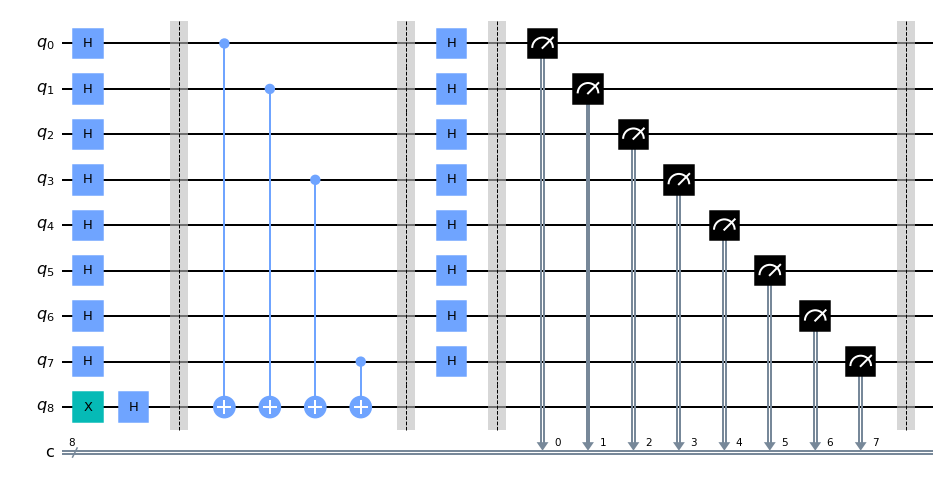

In [77]:
circuit.draw(output="mpl")

In [78]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit,backend=simulator,shots=1).result()
counts = result.get_counts()
print(counts)

{'10001011': 1}
